<a href="https://colab.research.google.com/github/sohailshaik1708/Miscellaneous/blob/main/Final_Project_6319.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Sphere Function

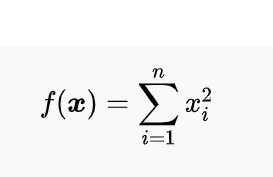

For n = 2, the function is written as 

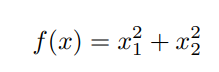

The Gradient of the function is 

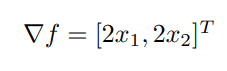

# 2. Rosenbrock Function

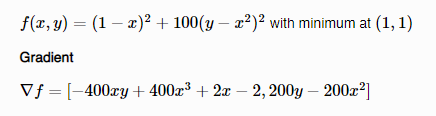

# 3. Quadratic Convex function

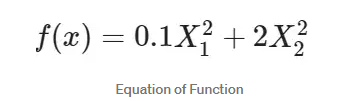

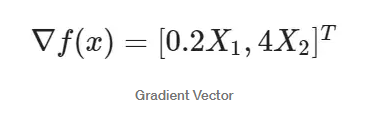

# 4. Himmelblau's function (Non-convex)

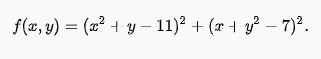

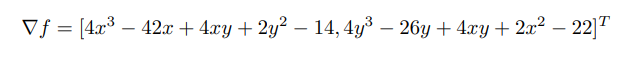

Since it is a non convex function, We can see in the below figure that it has many local minimum

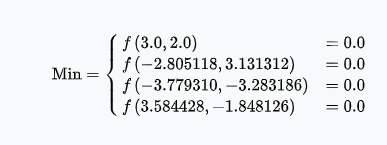

# Gradient Descent Algorithm

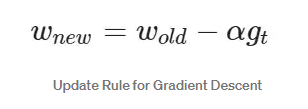

α = learning rate
gt = gradient of the function

# with Momentum

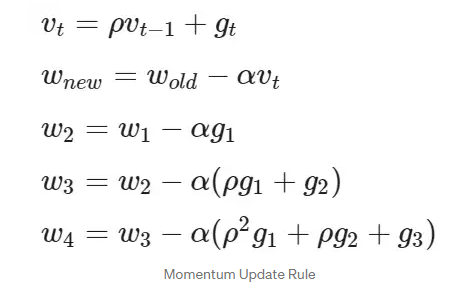

# Gradient Descent Function

During parameter passing for this function 


*   **test_function = 1 -- Sphere function**
*   **test_funtion = 2 -- Rosenbrock function**
*   **test_function = 3 -- Convex quadratic function**
*   **test_function = 4 -- Himmelblau's function**




In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sys

def grad_descent(test_function,learning_rate,initial_param,intial_param_momentum,momentum_coeff,max_iter):

  '''This function implements gradient descent algorithm for any given function, it generates the two dimentional quadratic suraface as a heat map'''

  ''' Paramenters 
      test_function - Test function for optimization 1 - SPHERE FUNCTION, 2- ROSENBROCK FUNCTION, 3- A FUNCTION OF CHOOSING
      lr - Learning rate, also know as step size, It determines the magnitude of the oscillations if the algorithm converges to an orbit but not to a fixed point
      initial_param - Intial parameters are the point from which the algorithm converges to an optimal point.
      intial_param_momentum - Intial params for momentum.
      momentum_coeff - It accelerates the converging to optimum point.
      max_iter - When to stop convergence for optimal point it might be using number of iteration or threshold value'''

  lr=learning_rate
  l1_gd=[]
  l2_gd=[]
  v1,v2=0,0
  gamma = momentum_coeff
  x1,x2= initial_param[0],initial_param[1]
  x1_m,x2_m = intial_param_momentum[0],intial_param_momentum[1]
  l1_gd_m,l2_gd_m=[],[]
  for i in range(max_iter):
    if test_function == 1:
      l1_gd.append(x1)
      l2_gd.append(x2)
      x1=x1-lr*(2*x1)
      x2=x2-lr*(2*x2)

      l1_gd_m.append(x1_m)
      l2_gd_m.append(x2_m)
      v1=gamma*v1+(2*x1_m)
      v2=gamma*v2+ (2*x2_m)
      x1_m=x1_m-lr*v1
      x2_m=x2_m-lr*v2
  
    elif test_function == 2:
      l1_gd.append(x1)
      l2_gd.append(x2)
      x1=x1-lr*((-400*x1*x2) + (400*x1**3) + (2*x1 - 2))
      x2=x2-lr*200*(x2-(x1**2))

      l1_gd_m.append(x1_m)
      l2_gd_m.append(x2_m)
      v1=gamma*v1+(-400*x1_m*x2_m + 400*x1_m**3 + 2*x1_m - 2)
      v2=gamma*v2+ 200*(x2_m-x1_m**2)
      x1_m=x1_m-lr*v1
      x2_m=x2_m-lr*v2

    elif test_function == 3:
      l1_gd.append(x1)
      l2_gd.append(x2)
      x1=x1-lr*(0.2*x1)
      x2=x2-lr*(4*x2)

      l1_gd_m.append(x1_m)
      l2_gd_m.append(x2_m)
      v1=gamma*v1+(0.2*x1_m)
      v2=gamma*v2+ (4*x2_m)
      x1_m=x1_m-lr*v1
      x2_m=x2_m-lr*v2

    elif test_function == 4:
      l1_gd.append(x1)
      l2_gd.append(x2)
      x1=x1-lr*(4*(x1**3) - 42*x1 + 4*x1*x2 + 2*(x2**2) -14)
      x2=x2-lr*(4*(x2**3) - 26*x2 + 4*x1*x2 + 2*(x1**2) - 22)

      l1_gd_m.append(x1_m)
      l2_gd_m.append(x2_m)
      v1=gamma*v1+ (4*(x1_m**3) - 42*x1_m + 4*x1_m*x2_m + 2*(x2_m**2) -14)
      v2=gamma*v2+ (4*(x2_m**3) - 26*x2_m + 4*x1_m*x2_m + 2*(x1_m**2) - 22)
      x1_m=x1_m-lr*v1
      x2_m=x2_m-lr*v2

  fig = plt.figure(figsize=(13,6))
  left, bottom, width, height = 100, 0.1, 0.8, 0.8

  ax = fig.add_axes([left, bottom, width, height]) 

  start, stop, n_values = -8, 8, 100

  x_vals = np.linspace(start, stop, n_values)
  y_vals = np.linspace(start, stop, n_values)
  X1, X2 = np.meshgrid(x_vals, y_vals)
  
  if test_function == 1:
    Z = (X1**2 + X2**2)
  if test_function == 2:
    Z = np.sqrt((1 + X1)**2 + 100*(X2 - X1**2)**2)
  if test_function == 3:
    Z = np.sqrt(0.1*X1**2 + 2*X2**2)
  if test_function == 4:
    Z = (X1**2 + X2 -11)**2 + (X1+X2**2 -7)**2

  plt.contourf(X1,X2,Z,)

  plt.plot(l1_gd[:15],l2_gd[:15],color="red",marker="*",markeredgecolor="black",linewidth=3,label="Gradient Descent")
  plt.plot(l1_gd_m[:15],l2_gd_m[:15],color="green",marker="*",markeredgecolor="orange",linewidth=3,label="Gradient Descent with momentum= "+str(momentum_coeff))

  plt.figure(figsize=(15,10))
  plt.figure(figsize=(15,10))
  ax.set_title('Level Sets of the Function',size=20)
  ax.set_xlabel('x (cm)')
  ax.set_ylabel('y (cm)')
  ax.legend()


  plt.show()

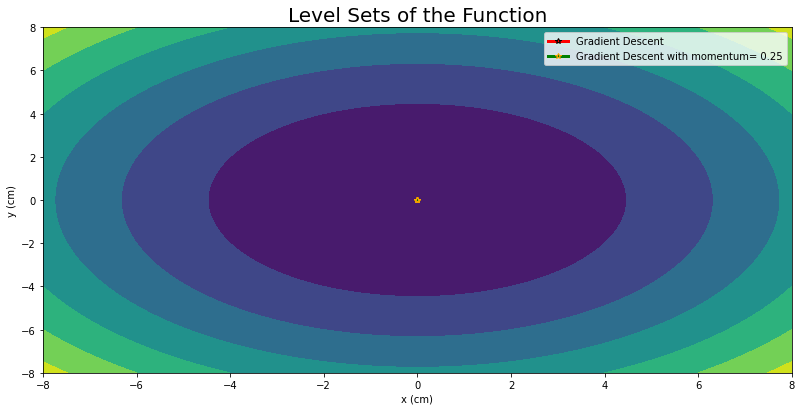

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [36]:
# Sphere function
grad_descent(test_function= 1,learning_rate= 0.4,initial_param = [0,0],intial_param_momentum = [0,0],momentum_coeff = 0.25,max_iter = 20)

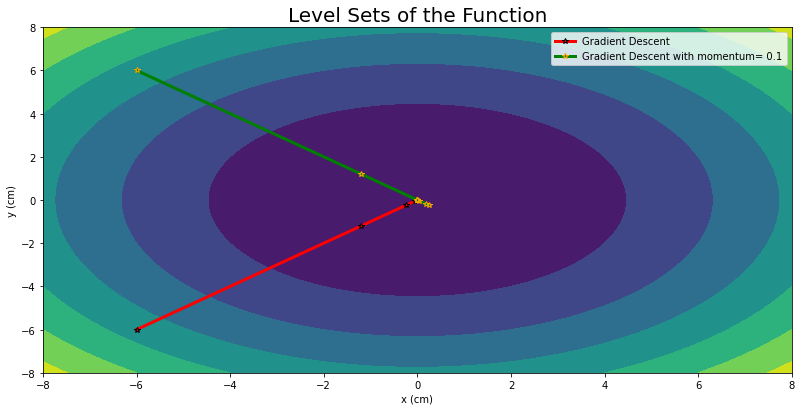

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [17]:
# Sphere function with different starting points
grad_descent(1,0.4,[-6,-6],[-6,6],0.1,20)

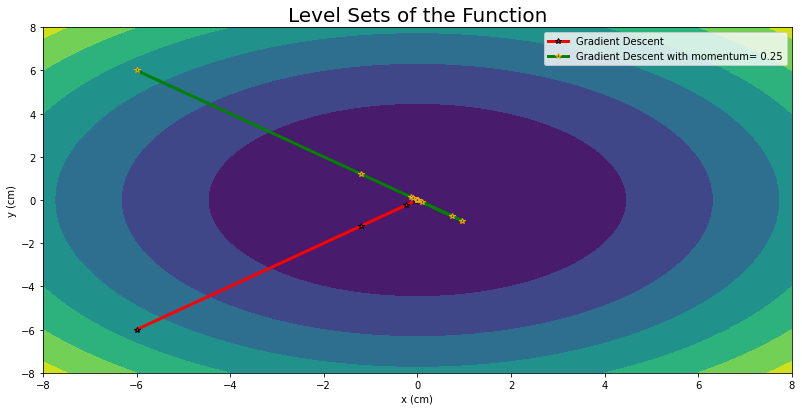

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [37]:
# Sphere function with same parameters but increased momentum
grad_descent(1,0.4,[-6,-6],[-6,6],0.25,20)

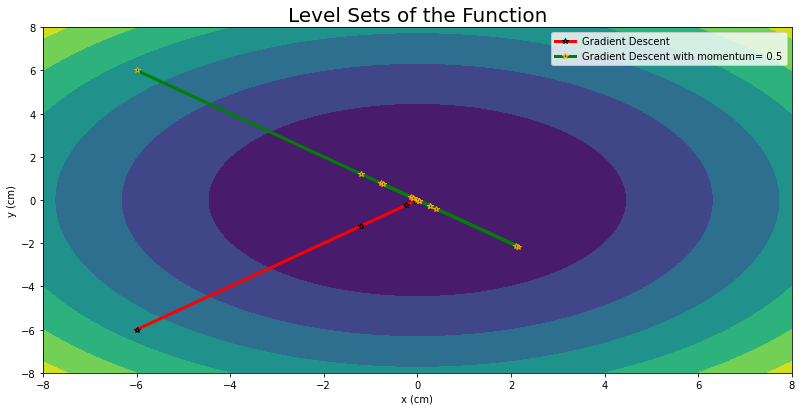

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [38]:
# Sphere function with 2x momentum compared to previous parameter
grad_descent(1,0.4,[-6,-6],[-6,6],0.5,20)

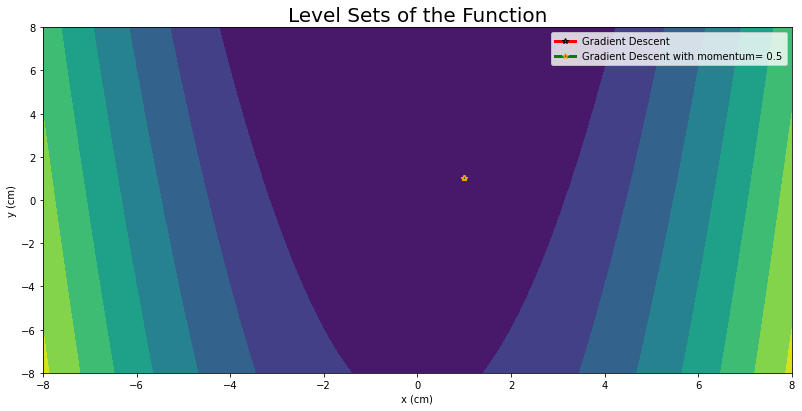

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [39]:
# Rosenbrock Function with minimum at (1,1), other parameters give an arithmatic overflow exception in python
grad_descent(2,0.4,[1,1],[1,1],0.5,20)

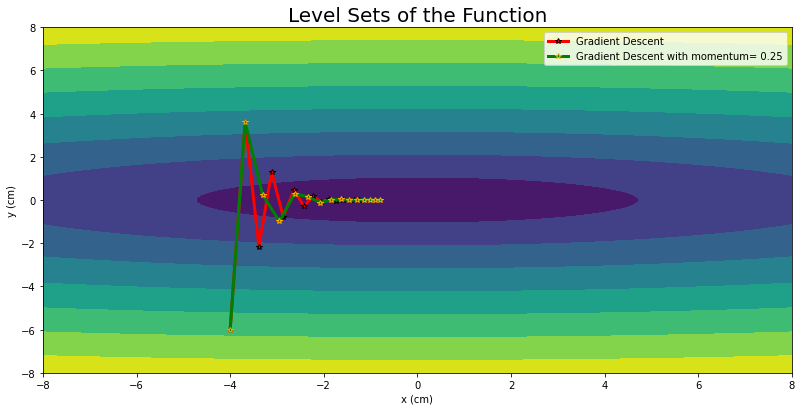

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [40]:
# Convex quadratic function 
grad_descent(3,0.4,[-4,-6],[-4,-6],0.25,20)

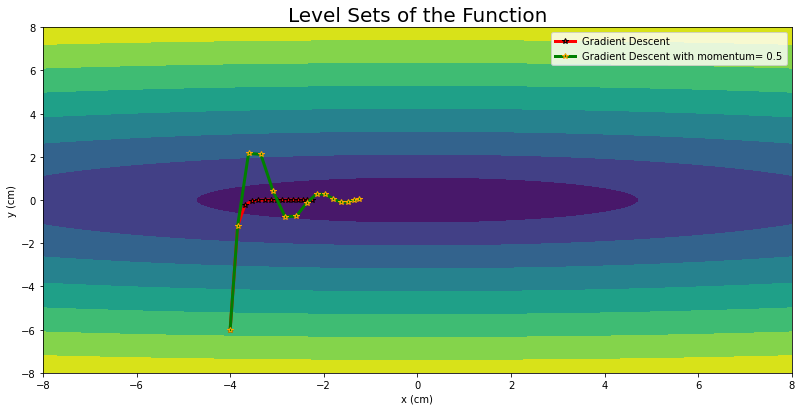

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [41]:
#Convex quadratic function with decreased learning rate and increased momentum
grad_descent(3,0.2,[-4,-6],[-4,-6],0.5,20)

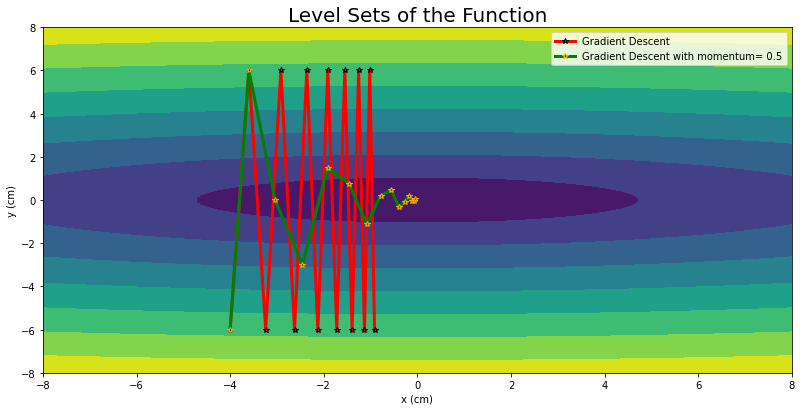

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [42]:
#Convex quadratic function with equal learning and momentum
grad_descent(3,0.5,[-4,-6],[-4,-6],0.5,20)

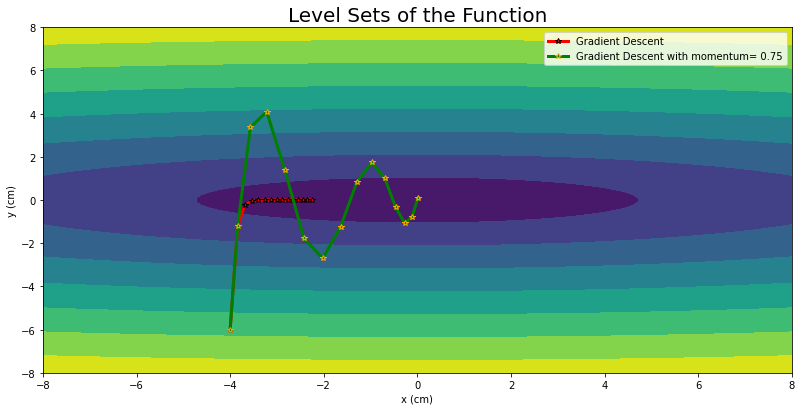

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [43]:
#Convex quadratic function with very large monentum
grad_descent(3,0.2,[-4,-6],[-4,-6],0.75,20)

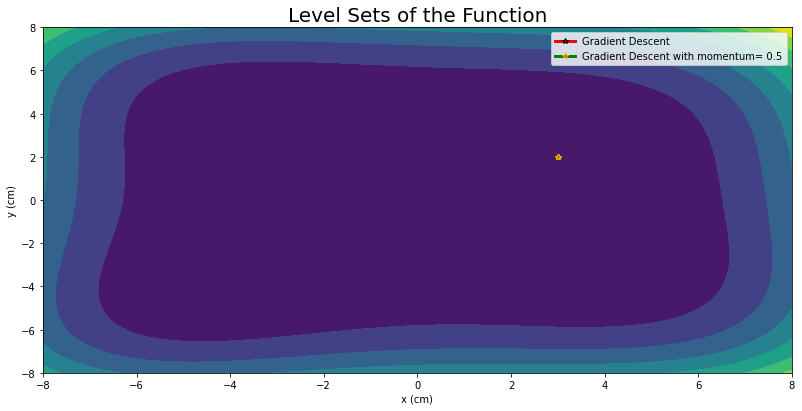

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [44]:
# Himmelblau's equation with local minimum at f(3,2) = 0
grad_descent(4,0.4,[3,2],[3,2],0.5,20)

# Himmelblau's Function

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


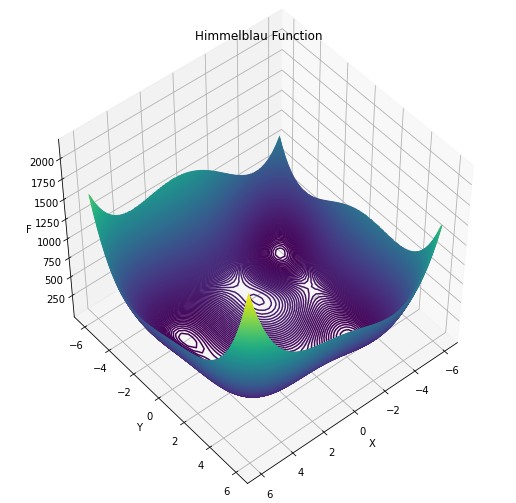

In [35]:
from mpl_toolkits import mplot3d 

def f(x,y):
       return (((x**2+y-11)**2) + (((x+y**2-7)**2)))

X=np.linspace(-6,6)
Y=np.linspace(-6,6)

x,y=np.meshgrid(X,Y)
F=f(x,y)

fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(x,y,F,450)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

#plt.contour(x,y,F,15)
plt.show()